In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
# --- Load Dataset ---
data_dir = "/content/drive/MyDrive/data week 11/Images Dataset"

In [ ]:
# Updated label map (Only required classes)
label_map = {
    '5 SR': 0,
    '10 SR': 1,
    '50 SR': 2,
    '100 SR': 3,
    '200 SR': 4
}

images, labels = [], []

In [ ]:
for folder_name in os.listdir(data_dir):
    if folder_name in label_map:
        label = label_map[folder_name]
        folder_path = os.path.join(data_dir, folder_name)
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (128, 128))
            img = img / 255.0
            images.append(img)
            labels.append(label)

images = np.array(images)
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [ ]:
# --- Data Augmentation ---
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)

In [ ]:
# --- Model Definition ---
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(0.4),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(0.4),

    GlobalAveragePooling2D(),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(5, activation='softmax')  # 5 classes
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 457,413 (1.74 MB)

 Trainable params: 456,453 (1.74 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
# --- Callbacks ---
early_stop = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=1e-6)

In [ ]:
# --- Train the model ---
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=60,
    validation_data=(X_test, y_test),
    callbacks=[early_stop, reduce_lr]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 26s 601ms/step - accuracy: 0.2425 - loss: 2.2737 - val_accuracy: 0.1684 - val_loss: 1.8843 - learning_rate: 0.0010
Epoch 2/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - accuracy: 0.4612 - loss: 1.6133 - val_accuracy: 0.1632 - val_loss: 1.9379 - learning_rate: 0.0010
Epoch 3/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 195ms/step - accuracy: 0.5682 - loss: 1.4142 - val_accuracy: 0.1789 - val_loss: 1.9471 - learning_rate: 0.0010
Epoch 4/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.5973 - loss: 1.2047 - val_accuracy: 0.1632 - val_loss: 2.3074 - learning_rate: 0.0010
Epoch 5/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - accuracy: 0.6721 - loss: 1.1132 - val_accuracy: 0.1526 - val_loss: 2.3402 - learning_rate: 0.0010
Epoch 6/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 149ms/step - accuracy: 0.6736 - loss: 1.0583 - val_accuracy: 0.1684 - val_loss: 2.5011 - learning_rate: 5.0000e-04
Epoch 7/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - accuracy: 0.7163 - loss: 0.99

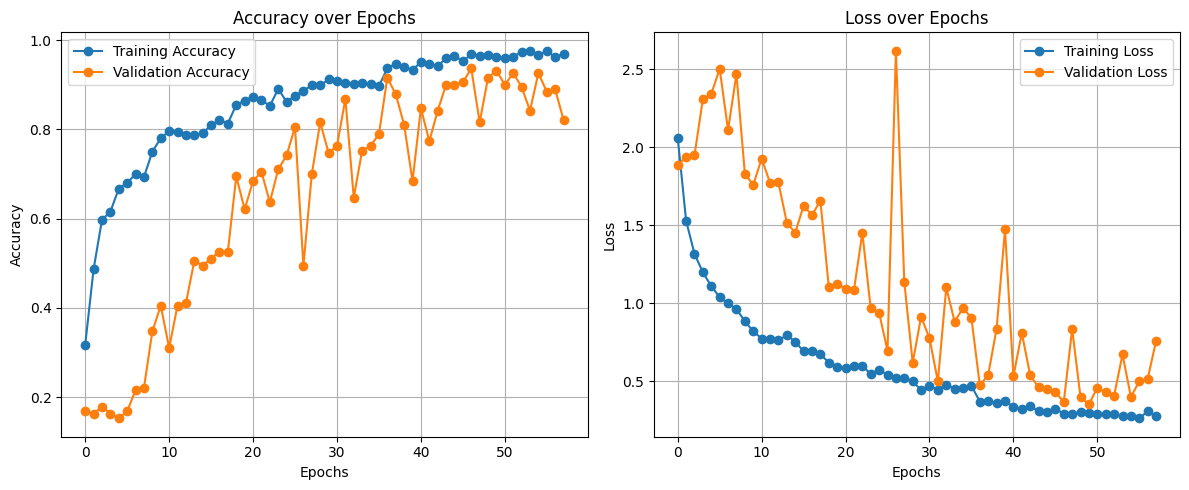

In [ ]:
# --- Plot training & validation accuracy and loss ---
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# --- Evaluate ---
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9349 - loss: 0.3311

✅ Test Accuracy: 93.16%
Test Loss: 0.3528


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 882ms/step


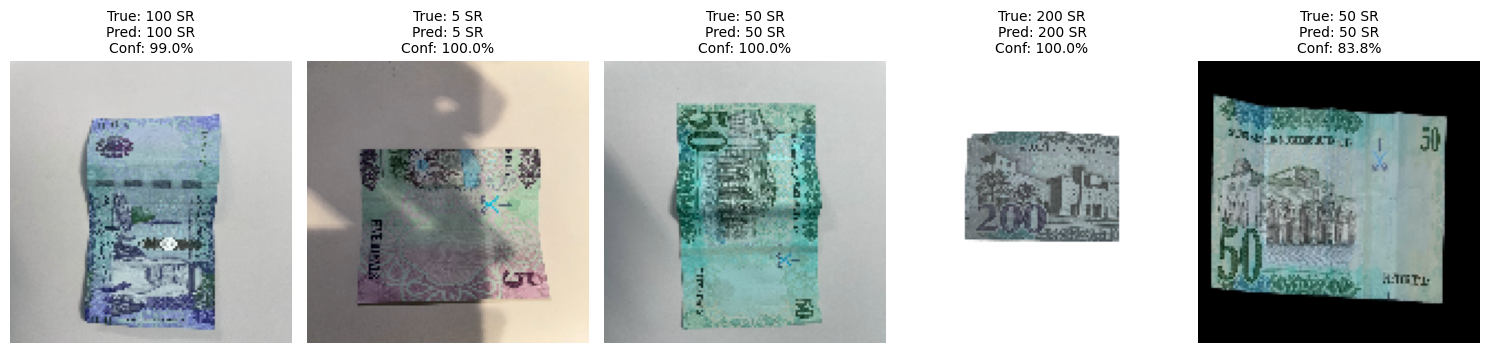

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- Map class indices to labels (reverse label_map)
class_labels = {0: '5 SR', 1: '10 SR', 2: '50 SR', 3: '100 SR', 4: '200 SR'}

# --- Pick N random test samples
num_samples = 5
indices = np.random.choice(len(X_test), num_samples, replace=False)
sample_images = X_test[indices]
sample_labels = y_test[indices]

# --- Predict using the model
predictions = model.predict(sample_images)
predicted_classes = np.argmax(predictions, axis=1)
confidence_scores = np.max(predictions, axis=1)

# --- Plot
plt.figure(figsize=(15, 5))
for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(sample_images[i])
    true_label = class_labels[sample_labels[i]]
    predicted_label = class_labels[predicted_classes[i]]
    confidence = confidence_scores[i] * 100
    plt.title(f"True: {true_label}\nPred: {predicted_label}\nConf: {confidence:.1f}%", fontsize=10)
    plt.axis('off')
plt.tight_layout()
plt.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step


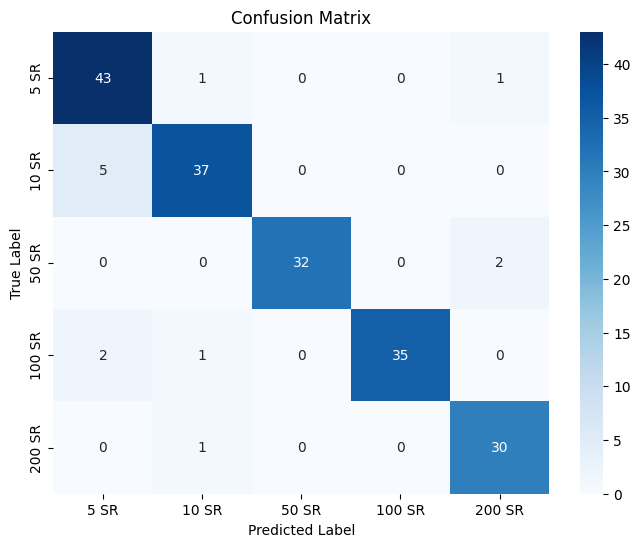

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# --- Get predictions for the whole test set
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# --- Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# --- Labels (same order as label_map)
labels = ['5 SR', '10 SR', '50 SR', '100 SR', '200 SR']

# --- Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# --- Save model in SavedModel format (for TFLite) ---
model_path = "/content/drive/MyDrive/currency_saved_model"
model.export(model_path)
print("✅ SavedModel exported successfully.")

Saved artifact at '/content/drive/MyDrive/currency_saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='keras_tensor_14')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  137328099235344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137328099236496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137328099238608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137328099237264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137328099234192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137328099237456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137328099239184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137328099239760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137328099239952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137328099238800: TensorSpec(shape=(), dtype=tf.resourc

In [ ]:
# --- Convert to TFLite ---
converter = tf.lite.TFLiteConverter.from_saved_model(model_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

tflite_path = "/content/drive/MyDrive/currency_model.tflite"
with open(tflite_path, "wb") as f:
    f.write(tflite_model)

print("✅ TFLite model saved to:", tflite_path)

✅ TFLite model saved to: /content/drive/MyDrive/currency_model.tflite
